## Importing libraries

In [2]:
import pickle
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

from keras import callbacks
from lime import lime_image
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
from tf_explain.core.grad_cam import GradCAM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Concatenate

from FunctionReference import Baseline_Model, CBAM_Model, SE_Model, Baseline_functional_model, Se_functional_model, Cbam_functional_model

C:\Users\peklu\Desktop\VisualAttentionAsExplanation\notebooks\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Meta parameters

In [3]:
LABEL_CLASS = 26
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS= 3

saving_dir = "CustomDatasetGradCAM\\"
model_dir = "..\\Models\\TrainedModels\\"

## Choose a model

In [4]:
model = load_model(model_dir + "TrainedBaselineModel.keras", compile=True)
#model = load_model(model_dir + "TrainedCbamModel.keras", compile=True)
#model = load_model(model_dir + "TrainedSeModel.keras", compile=True)

C:\Users\peklu\Desktop\VisualAttentionAsExplanation\notebooks\env\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 44 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Creating functional model and copying weights

In [5]:
functional_model = Baseline_functional_model(LABEL_CLASS, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
#functional_model = cbam_functional_model(LABEL_CLASS, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
#functional_model = Se_functional_model(LABEL_CLASS, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

functional_model.build((None, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))

In [6]:
for layer in functional_model.layers:
    try:
        layer.set_weights(model.get_layer(layer.name).get_weights())
    except (ValueError, AttributeError):
        print(layer.name)
        pass

input_layer


## Preparing images

In [7]:
path_a="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\a.jpg"
path_b="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\b.jpg"
path_c="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\c.jpg"
path_d="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\d.jpg"
path_e="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\e.jpg"
path_f="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\f.jpg"
path_g="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\g.jpg"
path_h="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\h.jpg"
path_i="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\i.jpg"
path_j="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\j.jpg"
path_k="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\k.jpg"
path_l="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\l.jpg"
path_m="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\m.jpg"
path_n="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\n.jpg"
path_o="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\o.jpg"
path_p="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\p.jpg"
path_q="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\q.jpg"
path_r="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\r.jpg"
path_s="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\s.jpg"
path_t="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\t.jpg"
path_u="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\u.jpg"
path_v="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\v.jpg"
path_w="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\w.jpg"
path_x="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\x.jpg"
path_y="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\y.jpg"
path_z="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\z.jpg"

In [8]:
# a
image_a = load_img(path_a, target_size=(64, 64))
image_array_a = img_to_array(image_a) / 255.0
image_input_a = np.expand_dims(image_array_a, axis=0)

# b
image_b = load_img(path_b, target_size=(64, 64))
image_array_b = img_to_array(image_b) / 255.0
image_input_b = np.expand_dims(image_array_b, axis=0)

# c
image_c = load_img(path_c, target_size=(64, 64))
image_array_c = img_to_array(image_c) / 255.0
image_input_c = np.expand_dims(image_array_c, axis=0)

# d
image_d = load_img(path_d, target_size=(64, 64))
image_array_d = img_to_array(image_d) / 255.0
image_input_d = np.expand_dims(image_array_d, axis=0)

# e
image_e = load_img(path_e, target_size=(64, 64))
image_array_e = img_to_array(image_e) / 255.0
image_input_e = np.expand_dims(image_array_e, axis=0)

# f
image_f = load_img(path_f, target_size=(64, 64))
image_array_f = img_to_array(image_f) / 255.0
image_input_f = np.expand_dims(image_array_f, axis=0)

# g
image_g = load_img(path_g, target_size=(64, 64))
image_array_g = img_to_array(image_g) / 255.0
image_input_g = np.expand_dims(image_array_g, axis=0)

# h
image_h = load_img(path_h, target_size=(64, 64))
image_array_h = img_to_array(image_h) / 255.0
image_input_h = np.expand_dims(image_array_h, axis=0)

# i
image_i = load_img(path_i, target_size=(64, 64))
image_array_i = img_to_array(image_i) / 255.0
image_input_i = np.expand_dims(image_array_i, axis=0)

# j
image_j = load_img(path_j, target_size=(64, 64))
image_array_j = img_to_array(image_j) / 255.0
image_input_j = np.expand_dims(image_array_j, axis=0)

# k
image_k = load_img(path_k, target_size=(64, 64))
image_array_k = img_to_array(image_k) / 255.0
image_input_k = np.expand_dims(image_array_k, axis=0)

# l
image_l = load_img(path_l, target_size=(64, 64))
image_array_l = img_to_array(image_l) / 255.0
image_input_l = np.expand_dims(image_array_l, axis=0)

# m
image_m = load_img(path_m, target_size=(64, 64))
image_array_m = img_to_array(image_m) / 255.0
image_input_m = np.expand_dims(image_array_m, axis=0)

# n
image_n = load_img(path_n, target_size=(64, 64))
image_array_n = img_to_array(image_n) / 255.0
image_input_n = np.expand_dims(image_array_n, axis=0)

# o
image_o = load_img(path_o, target_size=(64, 64))
image_array_o = img_to_array(image_o) / 255.0
image_input_o = np.expand_dims(image_array_o, axis=0)

# p
image_p = load_img(path_p, target_size=(64, 64))
image_array_p = img_to_array(image_p) / 255.0
image_input_p = np.expand_dims(image_array_p, axis=0)

# q
image_q = load_img(path_q, target_size=(64, 64))
image_array_q = img_to_array(image_q) / 255.0
image_input_q = np.expand_dims(image_array_q, axis=0)

# r
image_r = load_img(path_r, target_size=(64, 64))
image_array_r = img_to_array(image_r) / 255.0
image_input_r = np.expand_dims(image_array_r, axis=0)

# s
image_s = load_img(path_s, target_size=(64, 64))
image_array_s = img_to_array(image_s) / 255.0
image_input_s = np.expand_dims(image_array_s, axis=0)

# t
image_t = load_img(path_t, target_size=(64, 64))
image_array_t = img_to_array(image_t) / 255.0
image_input_t = np.expand_dims(image_array_t, axis=0)

# u
image_u = load_img(path_u, target_size=(64, 64))
image_array_u = img_to_array(image_u) / 255.0
image_input_u = np.expand_dims(image_array_u, axis=0)

# v
image_v = load_img(path_v, target_size=(64, 64))
image_array_v = img_to_array(image_v) / 255.0
image_input_v = np.expand_dims(image_array_v, axis=0)

# w
image_w = load_img(path_w, target_size=(64, 64))
image_array_w = img_to_array(image_w) / 255.0
image_input_w = np.expand_dims(image_array_w, axis=0)

# x
image_x = load_img(path_x, target_size=(64, 64))
image_array_x = img_to_array(image_x) / 255.0
image_input_x = np.expand_dims(image_array_x, axis=0)

# y
image_y = load_img(path_y, target_size=(64, 64))
image_array_y = img_to_array(image_y) / 255.0
image_input_y = np.expand_dims(image_array_y, axis=0)

# z
image_z = load_img(path_z, target_size=(64, 64))
image_array_z = img_to_array(image_z) / 255.0
image_input_z = np.expand_dims(image_array_z, axis=0)

## Grad-CAM

In [26]:
def gradcam(image, model, layer_name):      
    # Grad-CAM
    explainer = GradCAM()
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])
    print(predicted_class)

    # Apply Grad-CAM to obtain the heatmap
    heatmap = explainer.explain(
        validation_data=(image, None),
        model=model,
        layer_name=layer_name,
        class_index=predicted_class
    )

    cv2.imshow('original_heatmap', heatmap)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Removing the first dimension from the input image
    image_array = np.squeeze(image, 0)

    # Superimpose the heatmap on the input image
    height, width = image_array.shape[:2]
    
    heatmap = cv2.resize(heatmap, (width, height))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0, dtype=cv2.CV_8U)

    # Display the input image and the superimposed image with the heatmap
    fig, ax = plt.subplots()
    ax.imshow(superimposed_img)
    ax.axis('off')
    plt.show()

    return superimposed_img

## Choose a layer

In [10]:
layer_name = 'block5_conv4'

## Explanations

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
22


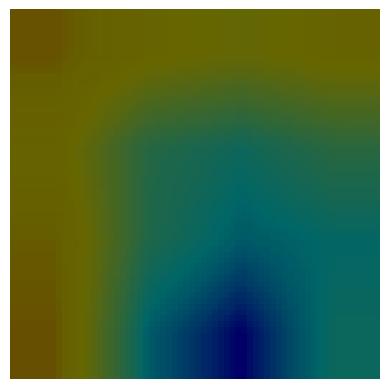

True

In [27]:
# Apply LIME for letter 'a'
image = gradcam(image_input_a, functional_model, layer_name)
cv2.imwrite(saving_dir + "image_a.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'b'
image = gradcam(image_input_b, model, layer_name)
cv2.imwrite(saving_dir + "image_b.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'c'
image = gradcam(image_input_c, model, layer_name)
cv2.imwrite(saving_dir + "image_c.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'd'
image = gradcam(image_input_d, model, layer_name)
cv2.imwrite(saving_dir + "image_d.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'e'
image = gradcam(image_input_e, model, layer_name)
cv2.imwrite(saving_dir + "image_e.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'f'
image = gradcam(image_input_f, model, layer_name)
cv2.imwrite(saving_dir + "image_f.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'g'
image = gradcam(image_input_g, model, layer_name)
cv2.imwrite(saving_dir + "image_g.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'h'
image = gradcam(image_input_h, model, layer_name)
cv2.imwrite(saving_dir + "image_h.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'i'
image = gradcam(image_input_i, model, layer_name)
cv2.imwrite(saving_dir + "image_i.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'j'
image = gradcam(image_input_j, model, layer_name)
cv2.imwrite(saving_dir + "image_j.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'k'
image = gradcam(image_input_k, model, layer_name)
cv2.imwrite(saving_dir + "image_k.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'l'
image = gradcam(image_input_l, model, layer_name)
cv2.imwrite(saving_dir + "image_l.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'm'
image = gradcam(image_input_m, model, layer_name)
cv2.imwrite(saving_dir + "image_m.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'n'
image = gradcam(image_input_n, model, layer_name)
cv2.imwrite(saving_dir + "image_n.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'o'
image = gradcam(image_input_o, model, layer_name)
cv2.imwrite(saving_dir + "image_o.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'p'
image = gradcam(image_input_p, model, layer_name)
cv2.imwrite(saving_dir + "image_p.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'q'
image = gradcam(image_input_q, model, layer_name)
cv2.imwrite(saving_dir + "image_q.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'r'
image = gradcam(image_input_r, model, layer_name)
cv2.imwrite(saving_dir + "image_r.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 's'
image = gradcam(image_input_s, model, layer_name)
cv2.imwrite(saving_dir + "image_s.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 't'
image = gradcam(image_input_t, model, layer_name)
cv2.imwrite(saving_dir + "image_t.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'u'
image = gradcam(image_input_u, model, layer_name)
cv2.imwrite(saving_dir + "image_u.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'v'
image = gradcam(image_input_v, model, layer_name)
cv2.imwrite(saving_dir + "image_v.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'w'
image = gradcam(image_input_w, model, layer_name)
cv2.imwrite(saving_dir + "image_w.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'x'
image = gradcam(image_input_x, model, layer_name)
cv2.imwrite(saving_dir + "image_x.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'y'
image = gradcam(image_input_y, model, layer_name)
cv2.imwrite(saving_dir + "image_y.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'z'
image = gradcam(image_input_z, model, layer_name)
cv2.imwrite(saving_dir + "image_z.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))